<a href="https://colab.research.google.com/github/SteveOat/Hit-Song/blob/main/%E0%B9%80%E0%B8%9B%E0%B8%99%E0%B8%8B%E0%B9%8C%E0%B9%81%E0%B8%81%E0%B9%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import numpy as np
from IPython.display import display_html

df_1 = pd.read_csv('Hot100.csv')
df_2 = pd.read_csv('spotify_full_list_20102023.csv')

<h1>Preparing Data

Remove **bracket ()**  from "Track" column to match the text format of song's name.

In [99]:
df_1['Track'] = df_1['Track'].str.replace(r'\(.*\)', '', regex=True)
df_2['Artist and Title'] = df_2['Artist and Title'].str.replace(r'\(.*\)', '', regex=True)


ดึง main genre

Select the "Genre" column from the "df_2" table to merge it with the "df_1" table, where the song names and artists match.

Delete the duplicate rows, then merge the rows that have the same song name but are sung by different artists to differentiate them.

แยกคอลัมน์ และ clean lower ' ' ***เพิ่มคอลัมน์ Artist ที่ไม่ได้ลบช่องว่างเพื่อใส่กราฟ***

In [103]:
df_1['Track'] = df_1['Track'].str.replace(' ','').str.lower()
df_1['Artist_No_Space'] = df_1['Artist'].str.replace(' ','').str.lower()


df_2[['Artist', 'Title']] = df_2['Artist and Title'].str.split('-', n=1, expand=True)

df_2['Artist'] = df_2['Artist'].str.replace(' ','').str.lower()
df_2['Title'] = df_2['Title'].str.replace(' ','').str.lower()
df_2_rename = df_2.rename(columns={'Title': 'Track'})


Merge & fill NaN
***ลบคอลัมน์ Artist_y และแก้ชื่อคอลัมน์ Artist_x เป็น Artist***

In [164]:
df_column = df_2_rename[['Track', 'Artist', 'main_genre','Streams']]
df_prefinal = pd.merge( df_1, df_column, left_on=['Track','Artist_No_Space'], right_on=['Track','Artist'], how='left' )
df_prefinal['main_genre'] = df_prefinal['main_genre'].fillna('Unknown')
df_prefinal = df_prefinal.drop(columns=['Artist_y'])
df_final = df_prefinal.rename(columns={'Artist_x': 'Artist'})
df_final['Track_n_artist'] = df_final['Track'] + '_' + df_final['Artist_No_Space']
df_final


,Track,Artist,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,...,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Artist_No_Space,main_genre,Streams,Track_n_artist
0,7rings,Ariana Grande,"thank u, next",2019,178626,4,0.780,0.321,1,-10.747,...,0.56200,0.000000,0.0881,0.315,139.961,50,arianagrande,Pop,2.307550e+09,7rings_arianagrande
1,breakfree,Ariana Grande,My Everything - Deluxe,2014,214840,4,0.686,0.702,7,-5.325,...,0.00637,0.000045,0.2040,0.290,129.948,76,arianagrande,Pop,9.188317e+08,breakfree_arianagrande
2,dangerouswoman,Ariana Grande,Dangerous Woman,2016,235946,3,0.664,0.602,4,-5.369,...,0.05290,0.000000,0.3560,0.289,134.049,70,arianagrande,Pop,1.161277e+09,dangerouswoman_arianagrande
3,godisawoman,Ariana Grande,Sweetener,2018,197546,4,0.602,0.658,1,-5.934,...,0.02330,0.000060,0.2370,0.268,145.031,75,arianagrande,Pop,1.079614e+09,godisawoman_arianagrande
4,intoyou,Ariana Grande,Dangerous Woman,2016,244453,4,0.623,0.734,9,-5.948,...,0.01620,0.000002,0.1450,0.370,107.853,71,arianagrande,Pop,1.405367e+09,intoyou_arianagrande
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,iremembereverything,Zach Bryan,Zach Bryan,2022,227195,4,0.429,0.453,0,-7.746,...,0.55400,0.000002,0.1020,0.155,77.639,89,zachbryan,World/Traditional,7.328718e+08,iremembereverything_zachbryan
640,ifshewantsacowboy,Zach Bryan,American Heartbreak,2023,192293,4,0.553,0.823,7,-3.194,...,0.02010,0.000000,0.1110,0.552,133.781,63,zachbryan,Unknown,NaN,ifshewantsacowboy_zachbryan
641,lettingsomeonego,Zach Bryan,DeAnn,2022,239761,4,0.543,0.117,0,-15.153,...,0.81100,0.000000,0.1470,0.395,83.607,65,zachbryan,Unknown,NaN,lettingsomeonego_zachbryan
642,somethingintheorange,Zach Bryan,Something in the Orange,2022,228013,3,0.369,0.192,4,-12.151,...,0.55500,0.000008,0.0954,0.148,175.212,87,zachbryan,World/Traditional,9.745785e+08,somethingintheorange_zachbryan


In [5]:
output_file = 'output.csv'
df_final.to_csv(output_file, index=False)
from google.colab import files

files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<hr>

<h1>Clustering Data

**1. Key**
*   Musical key of the track, represented by integers (0 = C, 1 = C#/Db, etc.).



In [6]:
df_final['Cluster_Key'] = np.where(df_final['Key'] == 0, 'C',
                                         np.where(df_final['Key'] == 1, 'C#/Db',
                                        np.where(df_final['Key'] == 2, 'D',
                                        np.where(df_final['Key'] == 3, 'Eb',
                                        np.where(df_final['Key'] == 4, 'E',
                                        np.where(df_final['Key'] == 5, 'F',
                                        np.where(df_final['Key'] == 6, 'F#/Gb',
                                        np.where(df_final['Key'] == 7, 'G',
                                        np.where(df_final['Key'] == 8, 'G#/Ab',
                                        np.where(df_final['Key'] == 9, 'A',
                                        np.where(df_final['Key'] ==  10, 'A#/Bb',
                                        np.where(df_final['Key'] ==  11, 'B',''))))))))))))

**2. Mode**
* Indicates whether the track is in a major (1) or minor (0) key.

In [7]:
df_final['Cluster_Mode'] = np.where(df_final['Mode'] == 0, 'Minor',
                                      np.where(df_final['Mode'] == 1, 'Major',''))

**3. Duration**
- Length of the track, usually in milliseconds.
 - Short: 0 - 180,000 ms (0 - 3 minutes)
 - Medium: 180,001 - 300,000 ms (3 - 5 minutes)
 - Long: 300,001 ms and above (5+ minutes)

In [8]:
df_final['Cluster_Duration(Min)'] = np.where(df_final['Duration'] < 180000, '0-3mins',
                                                  np.where(df_final['Duration'] < 300000, '3-5mins', '5+mins'))

**4. Danceability**
- How suitable a track is for dancing, from 0.0 to 1.0.
 - Low: 0.0 - 0.4 (e.g., classical, ambient)
 - Medium: 0.4 - 0.7 (e.g., soft rock, indie)
 - High: 0.7 - 1.0 (e.g., pop, dance, hip-hop)

In [9]:
df_final['Cluster_Danceability'] = np.where(df_final['Danceability'] <= 0.4, 'Low_Dance',
                                               np.where(df_final['Danceability'] <= 0.7, 'Mid_Dance',
                                               np.where(df_final['Danceability'] <=  1,'High_Dance','')))

**5. Energy**
- Measure of intensity and activity in the track, from 0.0 to 1.0.
 - Low Energy: 0.0 - 0.4 (e.g., acoustic, ambient, soft ballads)
 - Medium Energy: 0.4 - 0.7 (e.g., indie rock, chill electronic)
 - High Energy: 0.7 - 1.0 (e.g., EDM, rock, fast-paced pop)

In [10]:
df_final['Cluster_Energy'] = np.where(df_final['Energy'] <= 0.4, 'Low_Energy',
                                        np.where(df_final['Energy'] <= 0.7, 'Mid_Energy',
                                        np.where(df_final['Energy'] <=  1, 'High_Energy','')))

**6.Loudness**
- Spotify offers three loudness settings to control how normalization is applied:

 - Loud : This applies a normalization level of around -11 dB LUFS, suitable for noisier environments where higher volume is needed.
 - Normal (default) : This is the standard setting at -14 dB LUFS, aiming for balanced playback across all tracks.
 - Quiet : This setting lowers the loudness normalization target to -23 dB LUFS, ideal for quiet environments or more dynamic listening experiences.

In [11]:
df_final['Cluster_Loudness'] = np.where(df_final['Loudness'] >= -11, 'High_Loud',
                                            np.where(df_final['Loudness'] >= -14, 'Mid_Loud', 'Low_Loud'))

**7. Speechiness**
-  Detects the presence of spoken words in a track, from 0.0 to 1.0.
 - Low Speechiness: 0.0 - 0.33 (e.g., music without much spoken word)
 - Medium Speechiness: 0.33 - 0.66 (e.g., tracks with both music and speech, like rap)
 - High Speechiness: 0.66 - 1.0 (e.g., podcasts, spoken word tracks)

In [12]:
df_final['Cluster_Speechiness'] = np.where(df_final['Speechiness'] <= 0.333, 'Low_Speech',
                                               np.where(df_final['Speechiness'] <= 0.666, 'Mid_Speech',
                                               np.where(df_final['Speechiness'] <=  1, 'High_Speech','')))

**8. Acousticness**
- Confidence level that the track is acoustic, from 0.0 to 1.0.
 - Low Acousticness: 0.0 - 0.3 (e.g., electronic, heavily produced)
 - Medium Acousticness: 0.3 - 0.7 (e.g., some balance between acoustic and electronic elements)
 - High Acousticness: 0.7 - 1.0 (e.g., acoustic tracks, singer-songwriter)

In [13]:
df_final['Cluster_Acousticness'] = np.where(df_final['Acousticness'] <= 0.3, 'Low_Acoustic',
                                                np.where(df_final['Acousticness'] <= 0.7, 'Mid_Acoustic',
                                                np.where(df_final['Acousticness'] <=  1, 'High_Acoustic','')))

**9. Instrumentalness**
- Probability that the track contains no vocals, from 0.0 to 1.0.
 - Vocal-heavy: 0.0 - 0.1 (most mainstream music)
 - Medium Instrumentalness: 0.1 - 0.5 (vocals present but not dominant)
 - Instrumental: 0.5 - 1.0 (mostly instrumental, no vocals)

In [14]:
df_final['Cluster_Instrumentalness'] = np.where(df_final['Instrumentalness'] <= 0.1, 'Low_Instru',
                                                      np.where(df_final['Instrumentalness'] <= 0.5, 'Mid_Instru',
                                                      np.where(df_final['Instrumentalness'] <=  1, 'High_Instru','')))

**10. Liveness**
- Detects the presence of a live audience in the recording, from 0.0 to 1.0.
 - Studio-like: 0.0 - 0.3 (recorded in a studio without live ambiance)
 - Medium Liveness: 0.3 - 0.6 (some audience noise or live characteristics)
 - Live Recording: 0.6 - 1.0 (recorded live in concert with audience presence)

In [15]:
df_final['Cluster_Liveness'] = np.where(df_final['Liveness'] <= 0.3, 'Studio_Liveness','Outdoor_Liveness')

**11. Valence**
- Describes the musical positiveness conveyed by a track, from 0.0 to 1.0.
 - Low Valence: 0.0 - 0.3 (e.g., sad, melancholic tracks)
 - Medium Valence: 0.3 - 0.6 (e.g., neutral or emotionally mixed tracks)
 - High Valence: 0.6 - 1.0 (e.g., happy, cheerful, upbeat tracks)

In [16]:
df_final['Cluster_Valence'] = np.where(df_final['Valence'] <= 0.3, 'Low_Valence',
                                         np.where(df_final['Valence'] <= 0.6, 'Mid_Valence',
                                         np.where(df_final['Valence'] <=  1, 'High_Valence','')))

**12. Tempo**
- Speed of the track in beats per minute (BPM).
 - Slow: 0 - 60 BPM (e.g., ballads, ambient music)
 - Medium: 60 - 120 BPM (e.g., pop, mid-tempo rock)
 - Fast: 120 - 180+ BPM (e.g., dance, EDM, upbeat tracks)

In [17]:
df_final['Cluster_Tempo'] = np.where(df_final['Tempo'] <= 60 , 'Low_Tempo',
                                       np.where(df_final['Tempo'] <= 120 , 'Mid_Tempo', 'High_Tempo'))

In [18]:
output_file = 'output.csv'
df_final.to_csv(output_file, index=False)
from google.colab import files

files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<hr>

<h1>Challenge

<h1>Pearson's

In [19]:
from scipy.stats import pearsonr

# Example: Load your data into a DataFrame
# Replace 'your_data.csv' with the path to your CSV file
df = pd.read_csv('Pearson_material.csv')

# List to store results
correlation_results = {}

# Calculate Pearson's r for each feature against 'Popularity'
for column in df.columns:
    if column != 'Streams':
        # Calculate Pearson's r using pandas
        correlation = df['Streams'].corr(df[column])

        # Alternatively, calculate Pearson's r using scipy
        # correlation, _ = pearsonr(df['Popularity'], df[column])

        correlation_results[column] = correlation

# Convert results to a DataFrame for better visualization
correlation_df = pd.DataFrame(correlation_results.items(), columns=['Feature', 'Pearson_r'])
print(correlation_df)

FileNotFoundError: [Errno 2] No such file or directory: 'Pearson_material.csv'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your original DataFrame and 'Popularity' is the target column
popularity_corr = df.corr()[['Streams']]  # Select only the 'Popularity' row

plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(popularity_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation with Streams")
plt.show()

In [ ]:
import plotly.express as px

fig=px.imshow(df.corr(),text_auto=True,height=800,width=800,color_continuous_scale=px.colors.sequential.Greens,aspect='auto',title='<b>paiwise correlation of columns')
fig.update_layout(title_x=0.5)
fig.show()

<hr>

<h1>Test graph

In [ ]:
!pip install plotly==5.15.0



In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [ ]:
fig = make_subplots(
    rows=3,
    cols=3,
    subplot_titles=('<i>Popularity', '<i>Danceability', '<i>Energy', '<i>Loudness', '<i>Speechiness', '<i>Acousticness', '<i>Liveness', '<i>Valence', '<i>Tempo')
)

fig.add_trace(go.Histogram(x=df_final['Popularity'], name='Popularity'), row=1, col=1)
fig.add_trace(go.Histogram(x=df_final['Danceability'], name='Danceability'), row=1, col=2)
fig.add_trace(go.Histogram(x=df_final['Energy'], name='Energy'), row=1, col=3)
fig.add_trace(go.Histogram(x=df_final['Loudness'], name='Loudness'), row=2, col=1)
fig.add_trace(go.Histogram(x=df_final['Speechiness'], name='Speechiness'), row=2, col=2)
fig.add_trace(go.Histogram(x=df_final['Acousticness'], name='Acousticness'), row=2, col=3)
fig.add_trace(go.Histogram(x=df_final['Liveness'], name='Liveness'), row=3, col=1)
fig.add_trace(go.Histogram(x=df_final['Valence'], name='Valence'), row=3, col=2)
fig.add_trace(go.Histogram(x=df_final['Tempo'], name='Tempo'), row=3, col=3)

fig.update_layout(height=900, width=900, title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_dark', title_x=0.5)

# Show the figure
fig.show()


<hr>

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

Key VS Track

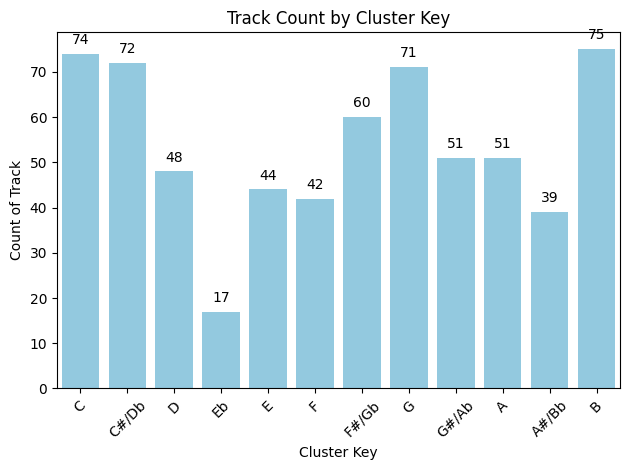

In [83]:
# Assuming 'df_final' is your DataFrame

# Group by 'Cluster_Key' and count 'Track'
cluster_key_count = df_final.groupby('Cluster_Key')['Track'].count().reset_index()

#กำหนดแกน x ว่าจะเรียงแบบไหน
sort_key = ['C', 'C#/Db', 'D', 'Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B']
# Create the bar plot
keyplot = sns.barplot(x='Cluster_Key', y='Track', data= cluster_key_count,color='skyblue', order=sort_key)

# Add labels to the bars
for p in keyplot.patches:
    keyplot.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

plt.xlabel("Cluster Key")
plt.ylabel("Count of Track")
plt.title("Track Count by Cluster Key")
plt.xticks(rotation=45, ha='center')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

Mode VS Track

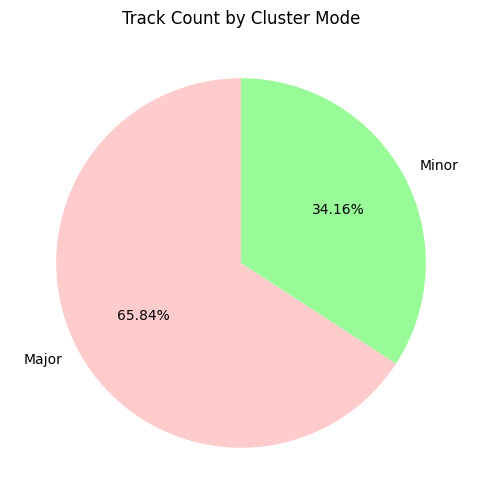

In [37]:
cluster_mode_count = df_final.groupby('Cluster_Mode')['Track'].count().reset_index()


track_counts = df_final['Cluster_Mode'].value_counts()
colors = ['#FFCCCB', '#98FB98', '#ADD8E6']

plt.figure(figsize=(8, 6))
plt.pie(track_counts, labels=track_counts.index, autopct='%1.2f%%',
        startangle=90, colors=colors)
plt.title('Track Count by Cluster Mode')
plt.show()

Duration VS Track

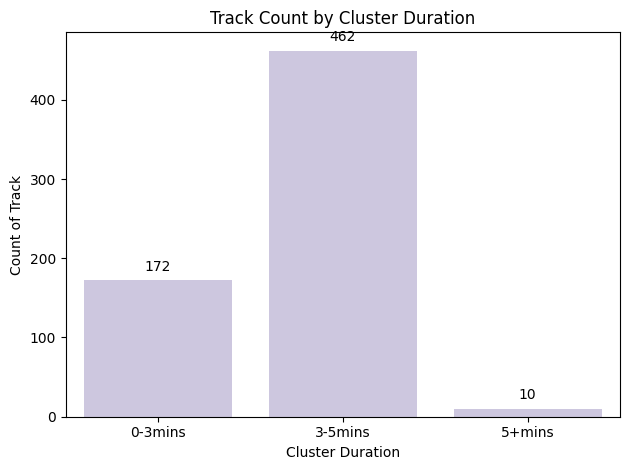

In [81]:
cluster_duration_count = df_final.groupby('Cluster_Duration(Min)')['Track'].count().reset_index()

keyplot = sns.barplot(x='Cluster_Duration(Min)', y='Track', data=cluster_duration_count,color='#CBC3E3')

for p in keyplot.patches:
    keyplot.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

plt.xlabel("Cluster Duration")
plt.ylabel("Count of Track")
plt.title("Track Count by Cluster Duration")
plt.xticks( ha='center')
plt.tight_layout()
plt.show()

Danceability VS Popularity VS Cluster

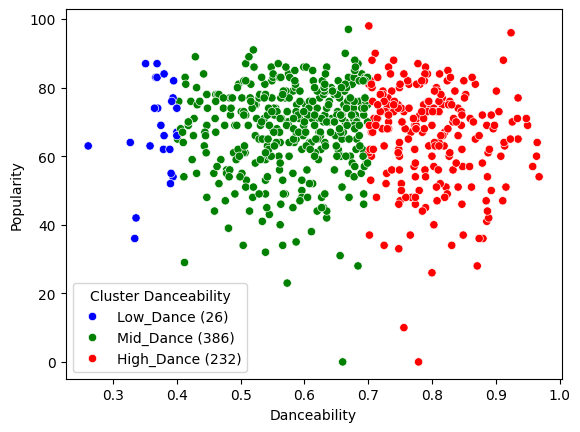

In [25]:
from ast import pattern
color = {'Low_Dance': 'blue','Mid_Dance': 'green','High_Dance': 'red'}

ax = sns.scatterplot(data=df_final, x='Danceability', y='Popularity', hue='Cluster_Danceability',palette=color)

handles, labels = ax.get_legend_handles_labels()

# Get the original labels without counts
original_labels = df_final['Cluster_Danceability'].unique()

# Create a mapping between original labels and handles
handle_dict = dict(zip(original_labels, handles))

# Define the desired order and get counts
sort_dance = ['Low_Dance', 'Mid_Dance', 'High_Dance']
counts = df_final['Cluster_Danceability'].value_counts()

# Create labels with counts for the legend
sorted_labels = [f"{label} ({counts.get(label, 0)})" for label in sort_dance]

# Get handles in the desired order (and ensure they exist in the data)
sorted_handles = [handle_dict[label] for label in sort_dance if label in handle_dict]

ax.legend(sorted_handles, sorted_labels, title='Cluster Danceability')

plt.show()

Energy VS Popularity VS Cluster

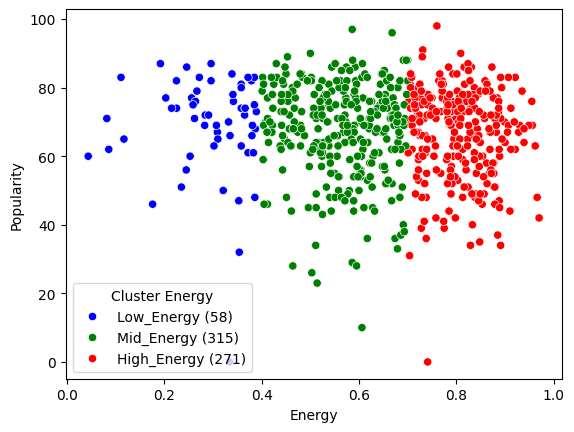

In [26]:
color = {'Low_Energy': 'blue','Mid_Energy': 'green','High_Energy': 'red'}

ax = sns.scatterplot(data=df_final, x='Energy', y='Popularity', hue='Cluster_Energy',palette=color)

handles, labels = ax.get_legend_handles_labels()

# Get the original labels without counts
original_labels = df_final['Cluster_Energy'].unique()

# Create a mapping between original labels and handles
handle_dict = dict(zip(original_labels, handles))

# Define the desired order and get counts
sort_dance = ['Low_Energy', 'Mid_Energy', 'High_Energy']
counts = df_final['Cluster_Energy'].value_counts()

# Create labels with counts for the legend
sorted_labels = [f"{label} ({counts.get(label, 0)})" for label in sort_dance]

# Get handles in the desired order (and ensure they exist in the data)
sorted_handles = [handle_dict[label] for label in sort_dance if label in handle_dict]

ax.legend(sorted_handles, sorted_labels, title='Cluster Energy')

plt.show()

Loudness VS Track

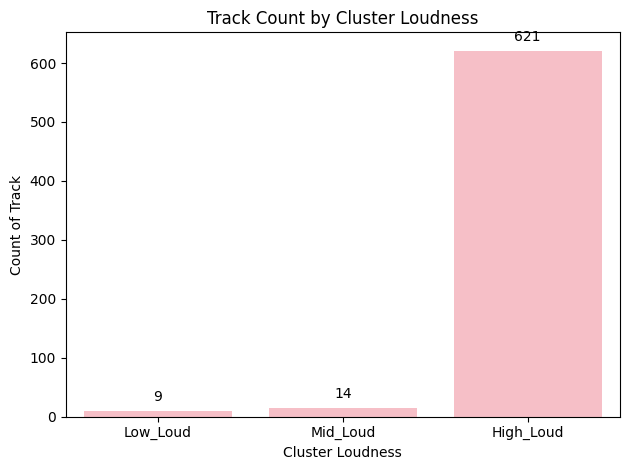

In [84]:
# Group by 'Cluster_Key' and count 'Track'
cluster_loud_count = df_final.groupby('Cluster_Loudness')['Track'].count().reset_index()

#กำหนดแกน x ว่าจะเรียงแบบไหน
sort_loud = ['Low_Loud', 'Mid_Loud', 'High_Loud']

# Adjust the figure size to increase height ถ้าอยากขยายกราฟ
#plt.figure(figsize=(8, 6))
# Create the bar plot
keyplot = sns.barplot(x='Cluster_Loudness', y='Track', data= cluster_loud_count,color='#FFB6C1', order=sort_loud)

# Add labels to the bars
for p in keyplot.patches:
    keyplot.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')


plt.xlabel("Cluster Loudness")
plt.ylabel("Count of Track")
plt.title("Track Count by Cluster Loudness")
plt.xticks( ha='center')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

Speechiness VS Popularity VS Cluster_Speechiness

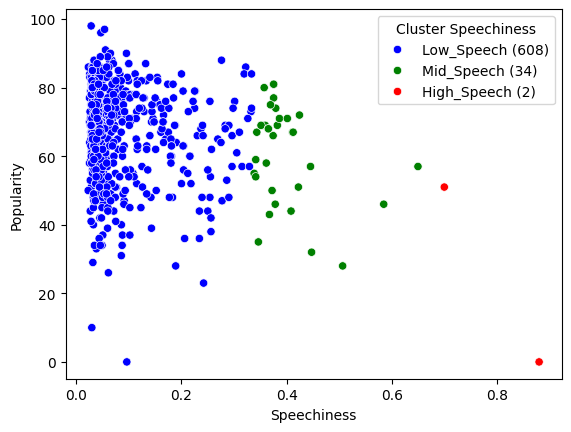

In [28]:
color = {'Low_Speech': 'blue','Mid_Speech': 'green','High_Speech': 'red'}

ax = sns.scatterplot(data=df_final, x='Speechiness', y='Popularity', hue='Cluster_Speechiness',palette=color)

handles, labels = ax.get_legend_handles_labels()

# Get the original labels without counts
original_labels = df_final['Cluster_Speechiness'].unique()

# Create a mapping between original labels and handles
handle_dict = dict(zip(original_labels, handles))

# Define the desired order and get counts
sort_dance = ['Low_Speech', 'Mid_Speech', 'High_Speech']
counts = df_final['Cluster_Speechiness'].value_counts()

# Create labels with counts for the legend
sorted_labels = [f"{label} ({counts.get(label, 0)})" for label in sort_dance]

# Get handles in the desired order (and ensure they exist in the data)
sorted_handles = [handle_dict[label] for label in sort_dance if label in handle_dict]

ax.legend(sorted_handles, sorted_labels, title='Cluster Speechiness')

plt.show()

Acouticness VS Popularity VS Cluster_Acouticness

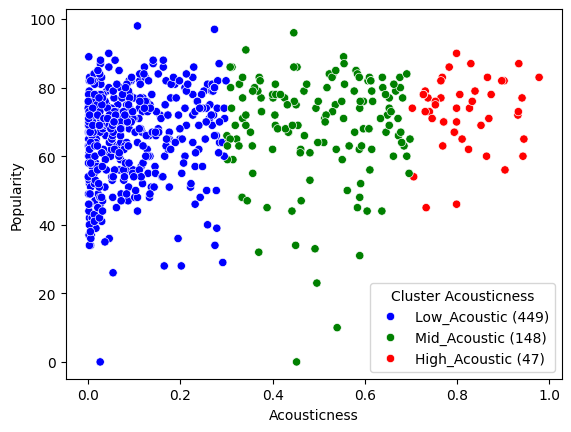

In [29]:
color = {'Low_Acoustic': 'blue','Mid_Acoustic': 'green','High_Acoustic': 'red'}

ax = sns.scatterplot(data=df_final, x='Acousticness', y='Popularity', hue='Cluster_Acousticness',palette=color)

handles, labels = ax.get_legend_handles_labels()

# Get the original labels without counts
original_labels = df_final['Cluster_Acousticness'].unique()

# Create a mapping between original labels and handles
handle_dict = dict(zip(original_labels, handles))

# Define the desired order and get counts
sort_dance = ['Low_Acoustic', 'Mid_Acoustic', 'High_Acoustic']
counts = df_final['Cluster_Acousticness'].value_counts()

# Create labels with counts for the legend
sorted_labels = [f"{label} ({counts.get(label, 0)})" for label in sort_dance]

# Get handles in the desired order (and ensure they exist in the data)
sorted_handles = [handle_dict[label] for label in sort_dance if label in handle_dict]

ax.legend(sorted_handles, sorted_labels, title='Cluster Acousticness')

plt.show()

Instrumentalness VS Popularity VS Cluster_Instrumentalness

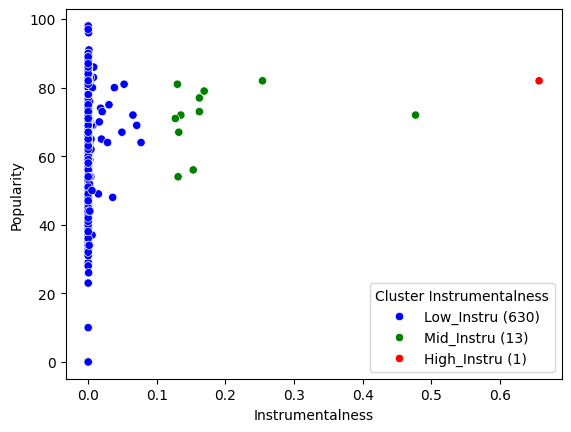

In [30]:
color = {'Low_Instru': 'blue','Mid_Instru': 'green','High_Instru': 'red'}

ax = sns.scatterplot(data=df_final, x='Instrumentalness', y='Popularity', hue='Cluster_Instrumentalness',palette=color)

handles, labels = ax.get_legend_handles_labels()

# Get the original labels without counts
original_labels = df_final['Cluster_Instrumentalness'].unique()

# Create a mapping between original labels and handles
handle_dict = dict(zip(original_labels, handles))

# Define the desired order and get counts
sort_dance = ['Low_Instru', 'Mid_Instru', 'High_Instru']
counts = df_final['Cluster_Instrumentalness'].value_counts()

# Create labels with counts for the legend
sorted_labels = [f"{label} ({counts.get(label, 0)})" for label in sort_dance]

# Get handles in the desired order (and ensure they exist in the data)
sorted_handles = [handle_dict[label] for label in sort_dance if label in handle_dict]

ax.legend(sorted_handles, sorted_labels, title='Cluster Instrumentalness')

plt.show()

Liveness VS Popularity VS Cluster_Liveness

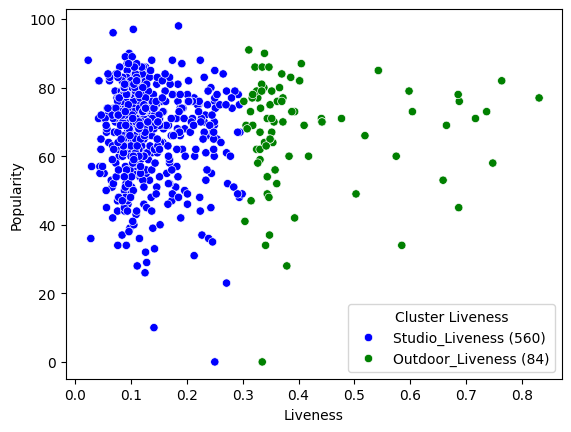

In [31]:
color = {'Studio_Liveness': 'blue','Outdoor_Liveness': 'green'}

ax = sns.scatterplot(data=df_final, x='Liveness', y='Popularity', hue='Cluster_Liveness',palette=color)

handles, labels = ax.get_legend_handles_labels()

# Get the original labels without counts
original_labels = df_final['Cluster_Liveness'].unique()

# Create a mapping between original labels and handles
handle_dict = dict(zip(original_labels, handles))

# Define the desired order and get counts
sort_dance = ['Studio_Liveness', 'Outdoor_Liveness']
counts = df_final['Cluster_Liveness'].value_counts()

# Create labels with counts for the legend
sorted_labels = [f"{label} ({counts.get(label, 0)})" for label in sort_dance]

# Get handles in the desired order (and ensure they exist in the data)
sorted_handles = [handle_dict[label] for label in sort_dance if label in handle_dict]

ax.legend(sorted_handles, sorted_labels, title='Cluster Liveness')

plt.show()

Valence VS Popularity VS Cluster_Valence

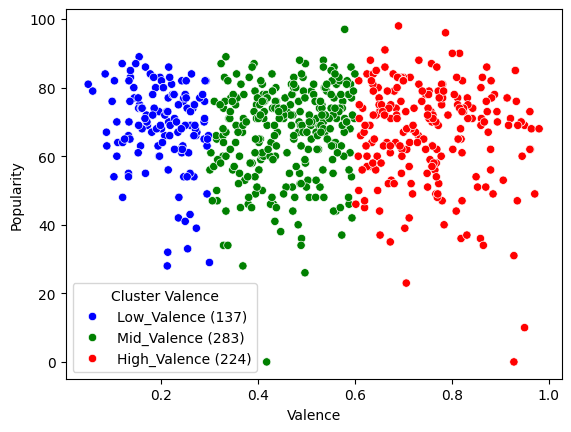

In [32]:
color = {'Low_Valence': 'blue','Mid_Valence': 'green','High_Valence': 'red'}

ax = sns.scatterplot(data=df_final, x='Valence', y='Popularity', hue='Cluster_Valence',palette=color)

handles, labels = ax.get_legend_handles_labels()

# Get the original labels without counts
original_labels = df_final['Cluster_Valence'].unique()

# Create a mapping between original labels and handles
handle_dict = dict(zip(original_labels, handles))

# Define the desired order and get counts
sort_dance = ['Low_Valence', 'Mid_Valence', 'High_Valence']
counts = df_final['Cluster_Valence'].value_counts()

# Create labels with counts for the legend
sorted_labels = [f"{label} ({counts.get(label, 0)})" for label in sort_dance]

# Get handles in the desired order (and ensure they exist in the data)
sorted_handles = [handle_dict[label] for label in sort_dance if label in handle_dict]

ax.legend(sorted_handles, sorted_labels, title='Cluster Valence')

plt.show()

Tempo VS Track

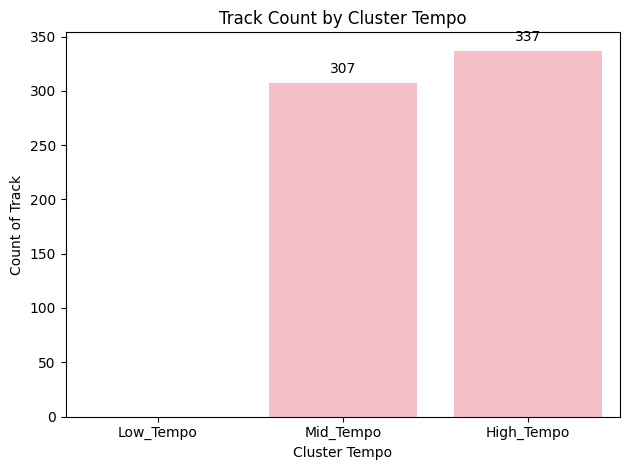

In [85]:
# Group by 'Cluster_Key' and count 'Track'
cluster_tempo_count = df_final.groupby('Cluster_Tempo')['Track'].count().reset_index()

#กำหนดแกน x ว่าจะเรียงแบบไหน
sort_tempo = ['Low_Tempo', 'Mid_Tempo', 'High_Tempo']

# Adjust the figure size to increase height ถ้าอยากขยายกราฟ
#plt.figure(figsize=(8, 6))
# Create the bar plot
keyplot = sns.barplot(x='Cluster_Tempo', y='Track', data= cluster_tempo_count,color='#FFB6C1', order=sort_tempo)

# Add labels to the bars
for p in keyplot.patches:
    keyplot.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')


plt.xlabel("Cluster Tempo")
plt.ylabel("Count of Track")
plt.title("Track Count by Cluster Tempo")
plt.xticks( ha='center')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

Artist VS Billboard **รู้ได้ยังไงว่าศิลปินมีชื่อเสียง**

<ipython-input-160-739f437848ef>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
<ipython-input-160-739f437848ef>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


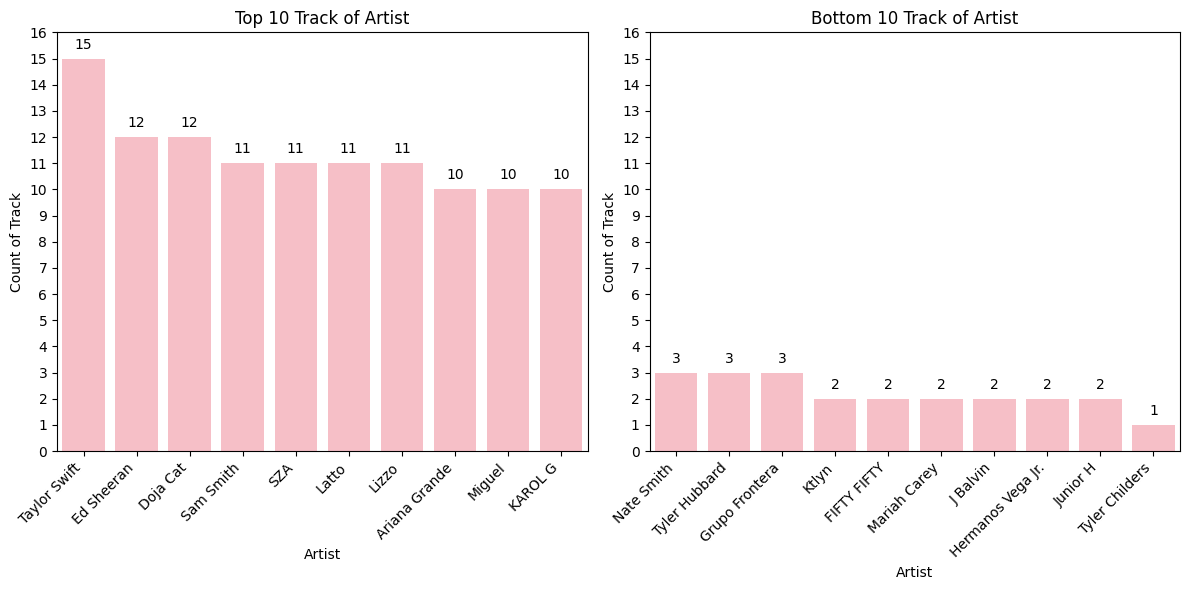

In [160]:
from matplotlib.ticker import MultipleLocator
cluster_artist_count = df_final.groupby('Artist')['Track'].count().reset_index().sort_values(by=['Track'],ascending=False)

# Get the top 10 rows
top_10 = cluster_artist_count.head(10)
# Create a figure with two subplots arranged horizontally (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Plot the first graph on ax1
sns.barplot(x='Artist', y='Track', data=top_10, color='#FFB6C1', ax=ax1)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center',
               xytext=(0, 10), textcoords='offset points')

ax1.set_xlabel("Artist")
ax1.set_ylabel("Count of Track")
ax1.set_title("Top 10 Track of Artist")
ax1.set_ylim(0, 16)
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


# Get the bottom 10 rows
bottom_10 = cluster_artist_count.tail(10)
# Plot the second graph on ax2
sns.barplot(x='Artist', y='Track', data=bottom_10, color='#FFB6C1', ax=ax2)
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), # Changed get_weight() to get_height()
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

ax2.set_xlabel("Artist")
ax2.set_ylabel("Count of Track")
ax2.set_title("Bottom 10 Track of Artist")
ax2.set_ylim(0, 16)
ax2.yaxis.set_major_locator(MultipleLocator(1))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Streams VS Track of Artist

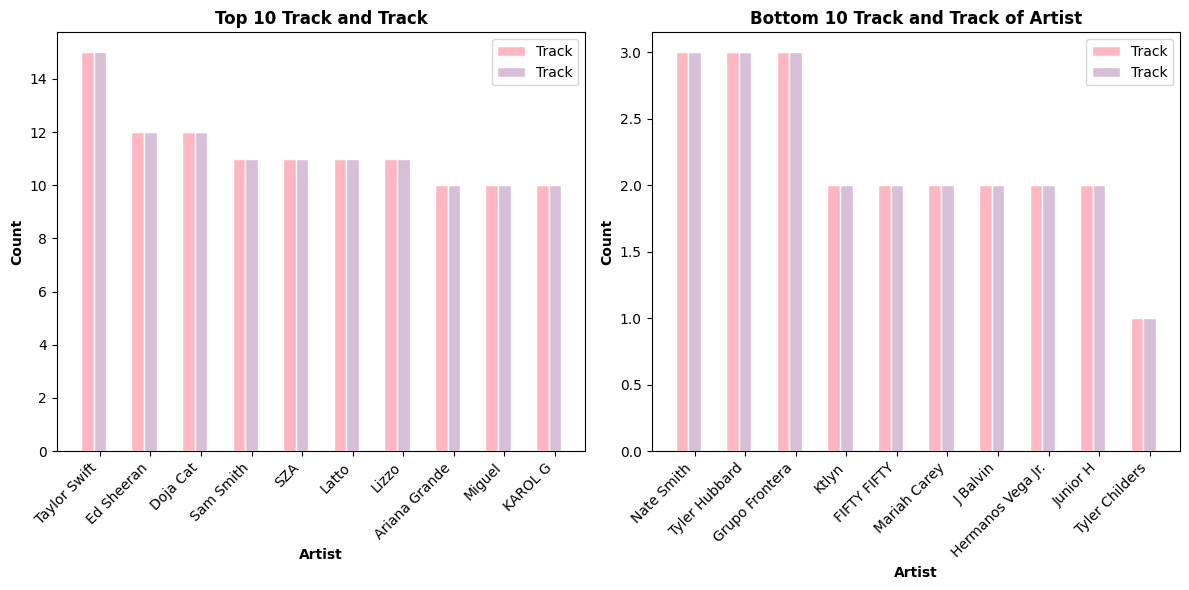

In [162]:
# Assuming 'Track' and 'Another_Column' are the two columns you want to compare
# Replace 'Another_Column' with the actual column name from your data

# ... (Your existing code for grouping and creating cluster_artist_count) ...

# Get the top 10 rows for both columns
top_10_track = cluster_artist_count.head(10)
top_10_another_column = df_final.groupby('Artist')['Track'].count().reset_index().sort_values(by=['Track'],ascending=False).head(10)

# Create a figure with two subplots arranged horizontally (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Function to create grouped bar chart
def create_grouped_bar_chart(ax, data1, data2, title):
    # Set width of bar
    barWidth = 0.25

    # Create bar positions
    r1 = np.arange(len(data1['Artist']))
    r2 = [x + barWidth for x in r1]

    # Make the plot
    ax.bar(r1, data1['Track'], color='#FFB6C1', width=barWidth, edgecolor='white', label='Track')
    ax.bar(r2, data2['Track'], color='#D8BFD8', width=barWidth, edgecolor='white', label='Track')

    # Add xticks on the middle of the group bars
    ax.set_xlabel("Artist", fontweight='bold')
    ax.set_xticks([r + barWidth for r in range(len(data1['Artist']))])
    ax.set_xticklabels(data1['Artist'], rotation=45, ha='right')

    # Add ylabel and title
    ax.set_ylabel("Count", fontweight='bold')
    ax.set_title(title, fontweight='bold')

    # Add legend
    ax.legend()

# Create grouped bar chart for top 10
create_grouped_bar_chart(ax1, top_10_track, top_10_another_column, "Top 10 Track and Track")

# Get the bottom 10 rows for both columns
bottom_10_track = cluster_artist_count.tail(10)
bottom_10_another_column = df_final.groupby('Artist')['Track'].count().reset_index().sort_values(by=['Track'],ascending=False).tail(10)

# Create grouped bar chart for bottom 10
create_grouped_bar_chart(ax2, bottom_10_track, bottom_10_another_column, "Bottom 10 Track and Track of Artist")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

<ipython-input-171-6937a8a80109>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
<ipython-input-171-6937a8a80109>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


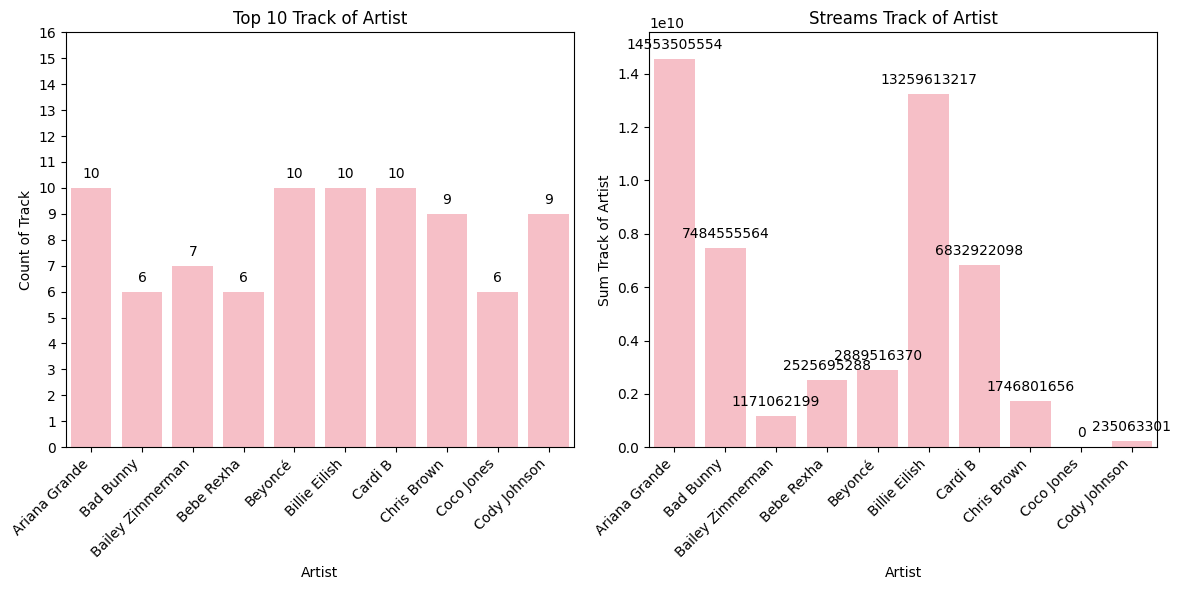

In [171]:
cluster_artist_count = df_final.groupby('Artist')['Track'].count().reset_index()
cluster_streams_of_artist_sum = df_final.groupby('Artist')['Streams'].sum().reset_index()
top_10_artist = cluster_artist_count.head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x='Artist', y='Track', data=top_10_artist, color='#FFB6C1', ax=ax1)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center',
               xytext=(0, 10), textcoords='offset points')

ax1.set_xlabel("Artist")
ax1.set_ylabel("Count of Track")
ax1.set_title("Top 10 Track of Artist")
ax1.set_ylim(0, 16)
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


top_10_streams_of_artist = cluster_streams_of_artist_sum.head(10)

sns.barplot(x='Artist', y='Streams', data=top_10_streams_of_artist, color='#FFB6C1', ax=ax2)
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')

ax2.set_xlabel("Artist")
ax2.set_ylabel("Sum Track of Artist")
ax2.set_title("Streams Track of Artist")
ax2.set_ylim(0, top_10_streams_of_artist['Streams'].max()+1000000000)

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
top_10_artist = cluster_artist_count.head(10)

#กำหนดแกน x ว่าจะเรียงแบบไหน
sort_tempo = ['Low_Tempo', 'Mid_Tempo', 'High_Tempo']

# Adjust the figure size to increase height ถ้าอยากขยายกราฟ
#plt.figure(figsize=(8, 6))
# Create the bar plot
keyplot = sns.barplot(x='Cluster_Tempo', y='Track', data= cluster_tempo_count,color='#FFB6C1', order=sort_tempo)

# Add labels to the bars
for p in keyplot.patches:
    keyplot.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')


plt.xlabel("Cluster Tempo")
plt.ylabel("Count of Track")
plt.title("Track Count by Cluster Tempo")
plt.xticks( ha='center')  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()